# K-means clustering

In this section you will create clusters based on book ratings using K-means operations. 

Are there similarities between books when we plot them in a graph? Are there possible clusters we can derive from this spatial layout? 

To help us cluster our book data, we will be using the sklearn Kmeans and a graph layout function from Ch.7 in our manual. 

## 1. Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv('data/BX-Book-Ratings-Subset.csv', sep=';')

## 1. Construct a ratings matrix 

To cluster our data we need to construct a matrix where each row is the ratings from all users for a certain book. In other words, the index of the matrix will be books ISBN and the columns user ratings (i.e., one column per User-ID).

Can you construct such (huge!) matrix with the dataset? (Hint: use the pandas dataframe `pivot` function)

In [3]:
matrix = df.pivot(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)

## 2.  Construct a sparse matrix using scipy.sparse

Now that you have a matrix built from the dataset we need to tranform it into a `scipy.sparse` `csr_matrix` in order to produce our clusters with `sklearn.cluster`

In [4]:
from scipy.sparse import csr_matrix
import numpy as np

sparse_matrix = csr_matrix(matrix.values)


## 3. Cluster!

Now that you have your matrix ready it is time to cluster! 

Can you fit your matrix into the 3x clusters Kmeans object?  

In [5]:
from sklearn.cluster import KMeans

kmeans_3_clusters = KMeans(n_clusters=3)

clusters = kmeans_3_clusters.fit(sparse_matrix)
# see https://scikit-learn.org/1.4/modules/generated/sklearn.cluster.KMeans.html for info on clusters

What does the  `clusters ` variable hold in terms of data?

## 4. Visualise clusters

Below is a (modified) `plot` function from our manual discussed in Ch.7. section 7.4.2. It displays clusters in a graph. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot(user_ratings, k):

        h = 0.2
        ratings_ndarray = np.asarray(user_ratings)
        reduced_data = PCA(n_components=2).fit_transform(ratings_ndarray)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(reduced_data)

        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = kmeans.cluster_centers_
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='r', zorder=10)
        plt.title('K-means clustering of the user')

Let's use this function to see how our books data can be clustered.  

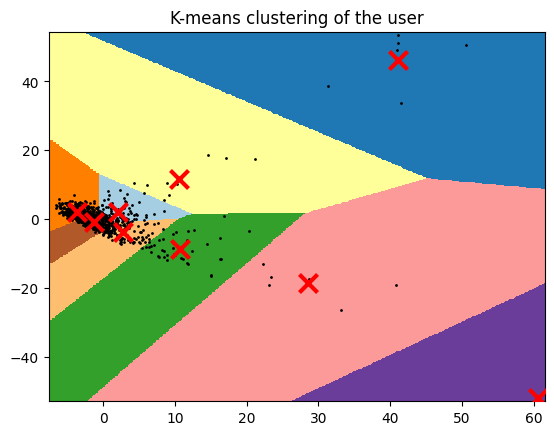

In [14]:
from scipy.sparse import dok_matrix

d_matrix = dok_matrix(sparse_matrix).todense()

plot(user_ratings=d_matrix, k=9)


## 5. How about users?

Can we you use the code above to cluster users depending on their ratings? Can you visualise this clustering using the `plot` function above?

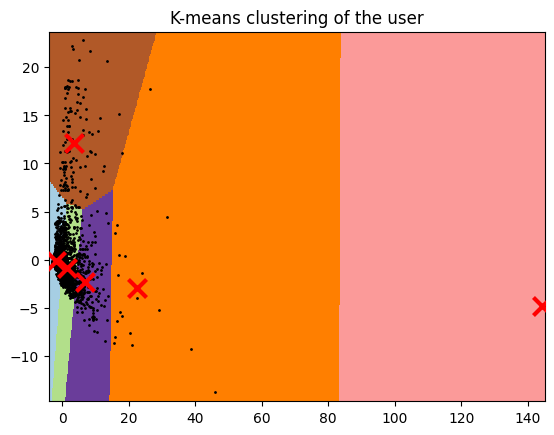

In [15]:
df_users = df.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
df_users

matrix_user = csr_matrix(df_users.values)

d_matrix_user = dok_matrix(matrix_user).todense()

plot(user_ratings=d_matrix_user, k=6)

## 6. Saving clusters

Create a dataframe consisting of 'User-ID' and cluster labels and save it in the data directory. To help you do this you can use the following code.

In [32]:
kmeans_3_clusters = KMeans(n_clusters=3)
nd_array_user = np.asarray(d_matrix_user)
clusters = kmeans_3_clusters.fit(nd_array_user) 

df_users.drop('label', axis='columns')
df_users['label'] = clusters.labels_
df_users['label'].to_csv('data/user-clusters.csv', sep=';')

